In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")
import plotly.express as px
import plotly.offline as pyo

__After Cleaning I can use this data for use.__

In [4]:
df=pd.read_csv('Data/food_prices_ind-2.csv')
df.head()

,Unnamed: 0,market,latitude,longitude,category,commodity,unit,pricetype,price,usdprice,Year,Month,day
0,1,Delhi,28.666667,77.216667,cereals and tubers,Rice,0,Retail,8,25,1994,1,15
1,2,Delhi,28.666667,77.216667,cereals and tubers,Wheat,0,Retail,5,15,1994,1,15
2,3,Delhi,28.666667,77.216667,miscellaneous food,Sugar,0,Retail,13,42,1994,1,15
3,4,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),0,Retail,31,98,1994,1,15
4,5,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,0,Retail,6,21,1994,1,15


In [5]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head()

,market,latitude,longitude,category,commodity,unit,pricetype,price,usdprice,Year,Month,day
0,Delhi,28.666667,77.216667,cereals and tubers,Rice,0,Retail,8,25,1994,1,15
1,Delhi,28.666667,77.216667,cereals and tubers,Wheat,0,Retail,5,15,1994,1,15
2,Delhi,28.666667,77.216667,miscellaneous food,Sugar,0,Retail,13,42,1994,1,15
3,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),0,Retail,31,98,1994,1,15
4,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,0,Retail,6,21,1994,1,15


__Category__

In [7]:
df['category'].describe()

count           165059
unique               6
top       oil and fats
freq             41748
Name: category, dtype: object

In [8]:
df['category'].unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'milk and dairy'],
      dtype=object)

In [9]:
df['category'].value_counts()

oil and fats             41748
cereals and tubers       38737
pulses and nuts          29630
miscellaneous food       29038
vegetables and fruits    16860
milk and dairy            9046
Name: category, dtype: int64

<Axes: xlabel='category', ylabel='count'>

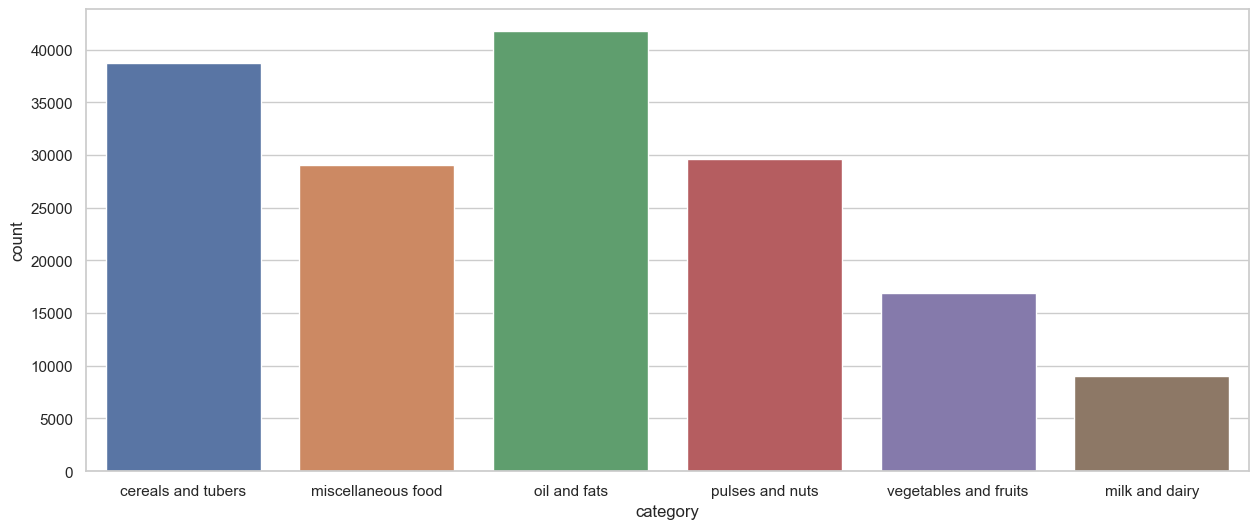

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['category'])

([<matplotlib.patches.Wedge at 0x19b89c832b0>,
 [Text(0.7706304502838597, 0.7849386658174612, 'cereals and tubers'),
  Text(-0.7543642826887286, 0.8005838675638675, 'miscellaneous food'),
  Text(-0.9725645297823116, -0.5139243479436554, 'oil and fats'),
  Text(0.0351568184862169, -1.0994380374145363, 'pulses and nuts'),
  Text(0.8654410255099448, -0.6789785205470754, 'vegetables and fruits'),
  Text(1.0837361234649472, -0.18845693061590765, 'milk and dairy')],
 [Text(0.4203438819730143, 0.4281483631731606, '25%'),
  Text(-0.41147142692112465, 0.4366821095802913, '23%'),
  Text(-0.5304897435176245, -0.28032237160563017, '18%'),
  Text(0.019176446447027398, -0.5996934749533834, '18%'),
  Text(0.47205874118724256, -0.37035192029840475, '10%'),
  Text(0.5911287946172438, -0.10279468942685871, '5%')])

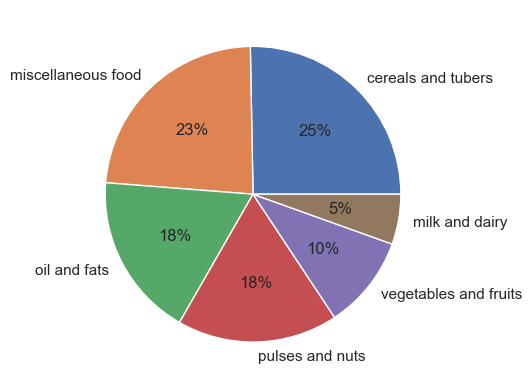

In [11]:
plt.pie(df['category'].value_counts(),labels=df['category'].unique(),autopct='%1.f%%')

<Axes: title={'center': 'Category'}>

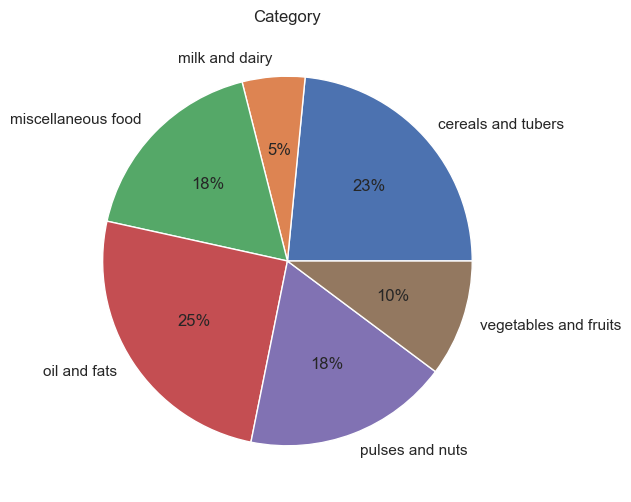

In [12]:
df.groupby('category').size().plot(kind='pie',autopct='%1.f%%',title='Category',figsize=(10,6))

### Observation :
1. Oil and Fats product category = __25%__
2. Cereals and tubers product category = __23%__
3. Pulses and nuts product category = __18%__
4. Miscellaneous food product category = __18%__
5. Vegetables and fruits product category = __10%__
6. Milk and dairy product category = __5%__


__Oil and Fats product are consume most. As a report, India is a major consumer of edible oils and fats due to its large population and diverse culinary practices. Edible oils and fats are an integral part of Indian cuisine and are used for cooking, frying, and flavoring various dishes. The consumption of oils and fats in India is influenced by cultural preferences, regional cooking styles, and dietary habits.__

__Commodity__

In [13]:
df['commodity'].describe()

count     165059
unique        23
top        Sugar
freq       11554
Name: commodity, dtype: object

In [14]:
df['commodity'].unique()

array(['Rice', 'Wheat', 'Sugar', 'Oil (mustard)', 'Potatoes', 'Chickpeas',
       'Onions', 'Milk', 'Wheat flour', 'Milk (pasteurized)',
       'Salt (iodised)', 'Oil (groundnut)', 'Oil (palm)',
       'Oil (sunflower)', 'Lentils (masur)', 'Tomatoes', 'Lentils',
       'Tea (black)', 'Sugar (jaggery/gur)', 'Ghee (vanaspati)',
       'Lentils (moong)', 'Lentils (urad)', 'Oil (soybean)'], dtype=object)

In [15]:
df['commodity'].value_counts()

Sugar                  11554
Rice                   11432
Oil (mustard)          10789
Wheat                  10266
Potatoes                8804
Onions                  8754
Wheat flour             8235
Salt (iodised)          8113
Tomatoes                8106
Milk (pasteurized)      8055
Lentils (masur)         7910
Lentils                 7648
Oil (sunflower)         7136
Lentils (moong)         6549
Lentils (urad)          6525
Sugar (jaggery/gur)     6394
Oil (groundnut)         6311
Ghee (vanaspati)        6243
Oil (palm)              6024
Oil (soybean)           5245
Tea (black)             2977
Chickpeas                998
Milk                     991
Name: commodity, dtype: int64

<Axes: xlabel='commodity', ylabel='count'>

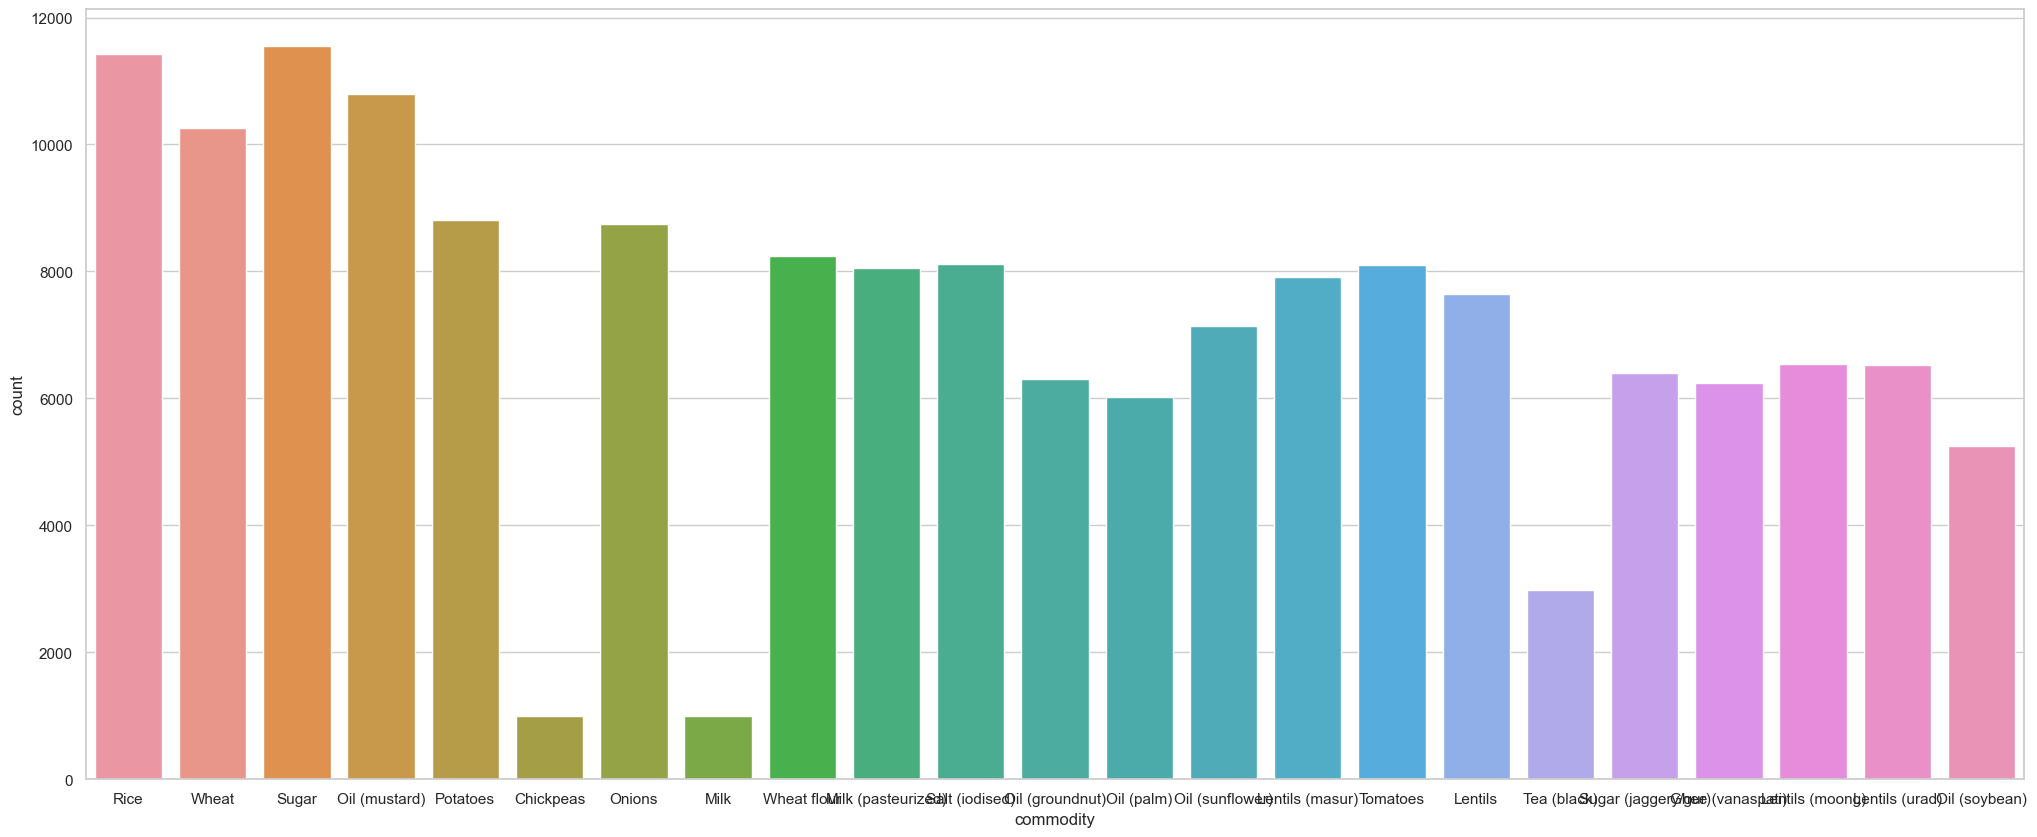

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x=df['commodity'])

<Axes: title={'center': 'Commodity'}>

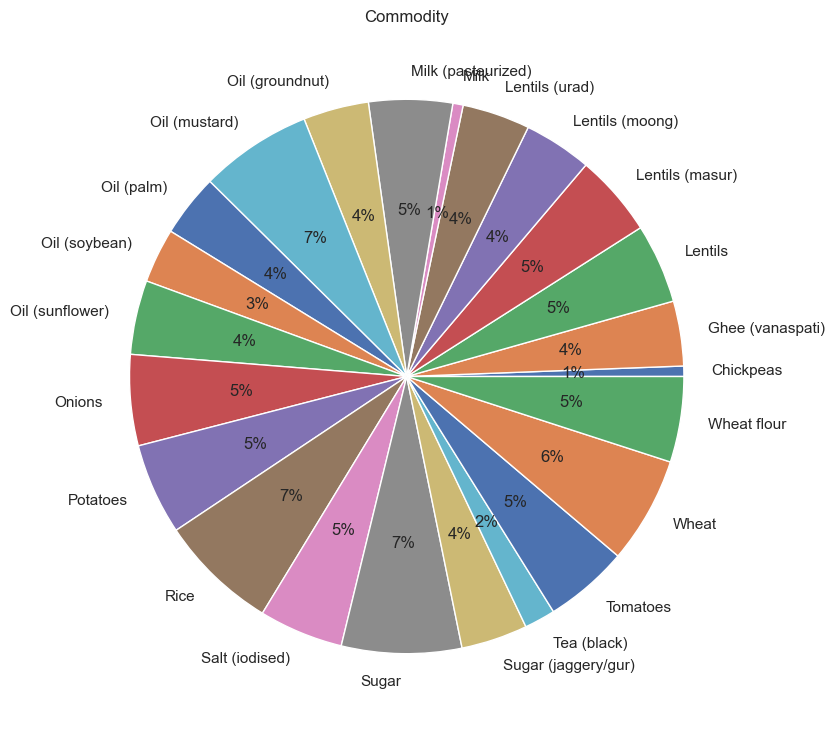

In [17]:
df.groupby('commodity').size().plot(kind='pie',autopct='%1.f%%',figsize=(10,9),title='Commodity')

### Observation :
Highest Selling Products
1. Sugar = __7%__
2. Rice = __7%__
3. Oil (mustard) = __7%__
4. Wheat = __6%__
5. Potatoes = __5%__
6. Onions = __5%__  

__Category and Commodity__

<Axes: xlabel='commodity', ylabel='count'>

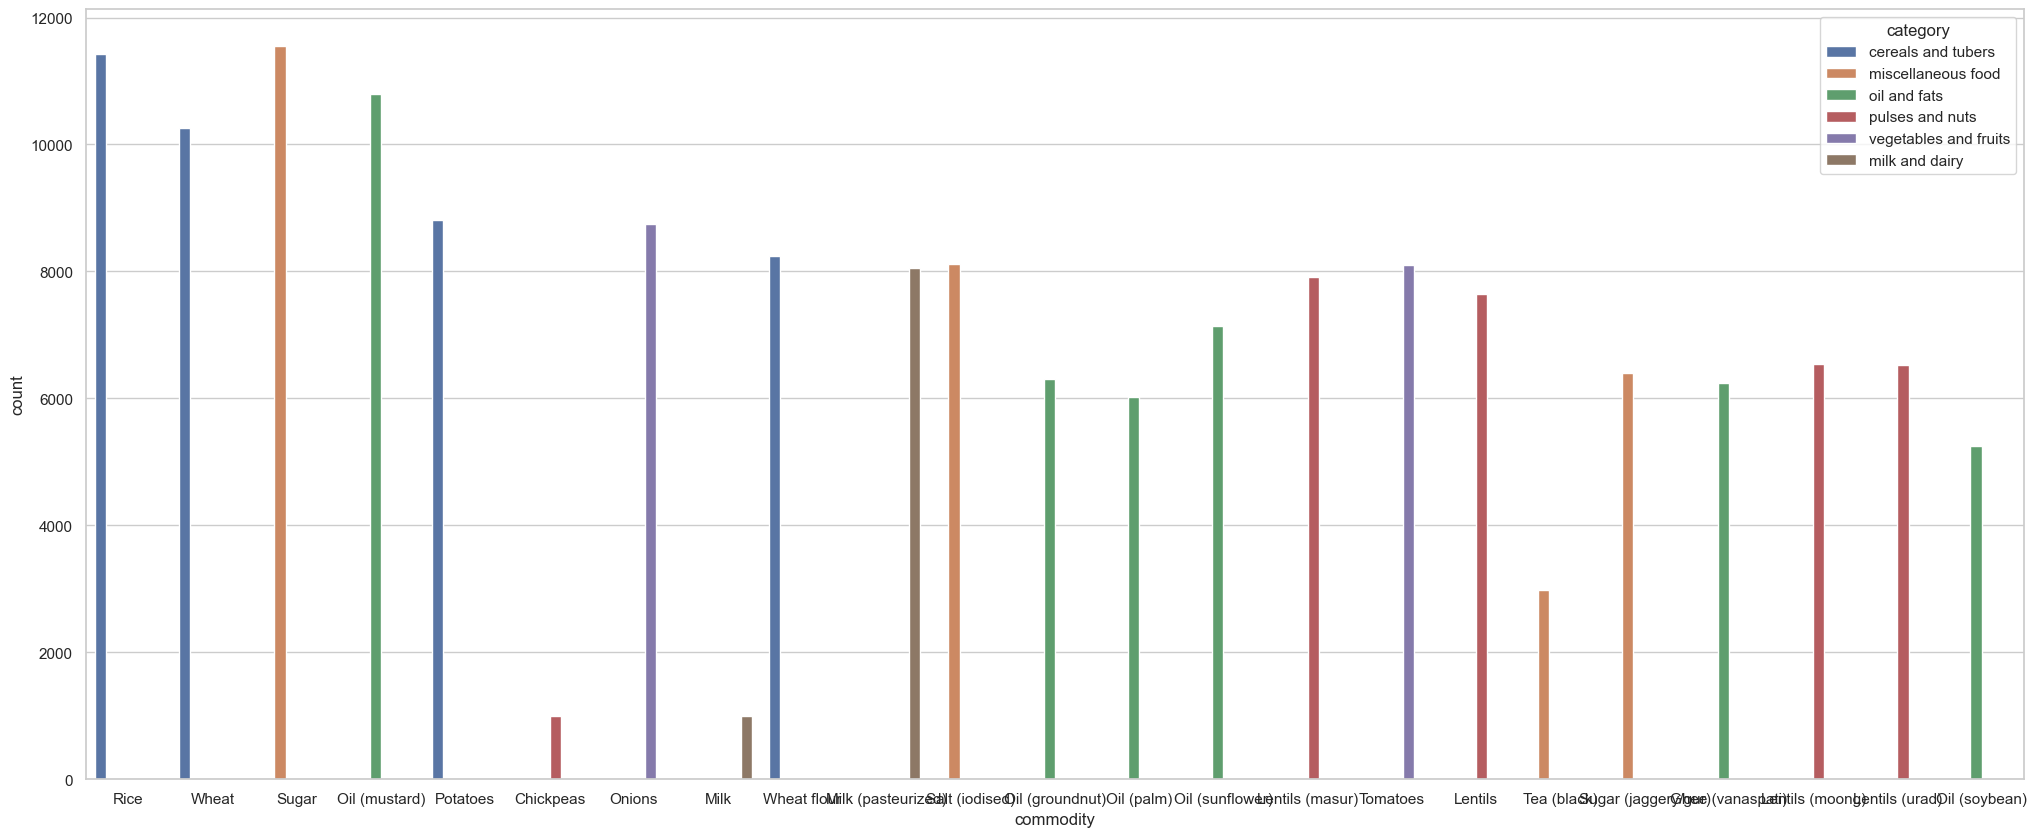

In [18]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,x='commodity',hue='category')

<Axes: ylabel='commodity'>

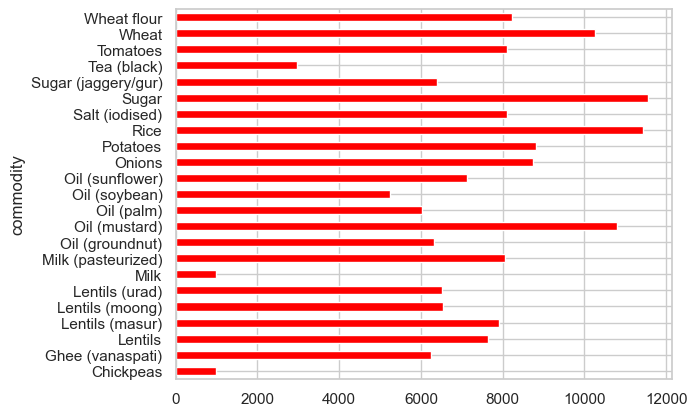

In [19]:
df.groupby('commodity')['category'].size().plot(kind='barh',color='red')

### Observation :
__Miscellaneous food, cereals and tubers, oils and fats category product are high in dataset with number of category.__  

__pricetype__

In [20]:
df['pricetype'].unique()

array(['Retail'], dtype=object)

In [21]:
df.drop(columns=['pricetype'],inplace=True)

### price(Indian INR)

In [22]:
df['price'].describe()

count    165059.000000
mean         64.543406
std          48.918707
min           2.000000
25%          25.000000
50%          45.000000
75%          96.000000
max         231.000000
Name: price, dtype: float64

<Axes: >

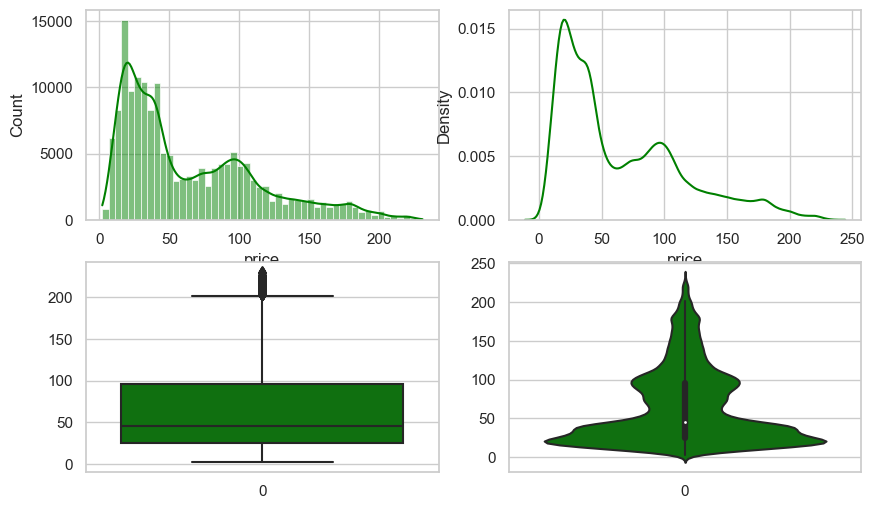

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(x=df['price'],bins=50,kde=True,color='green')
plt.subplot(2,2,2)
sns.kdeplot(df['price'],color='green')
plt.subplot(2,2,3)
sns.boxplot(df['price'],color='green')
plt.subplot(2,2,4)
sns.violinplot(df['price'],color='green')

### usdprice

In [24]:
df['usdprice'].describe()

count    165059.000000
mean         94.109524
std          67.699698
min           5.000000
25%          38.000000
50%          67.000000
75%         138.000000
max         306.000000
Name: usdprice, dtype: float64

<Axes: >

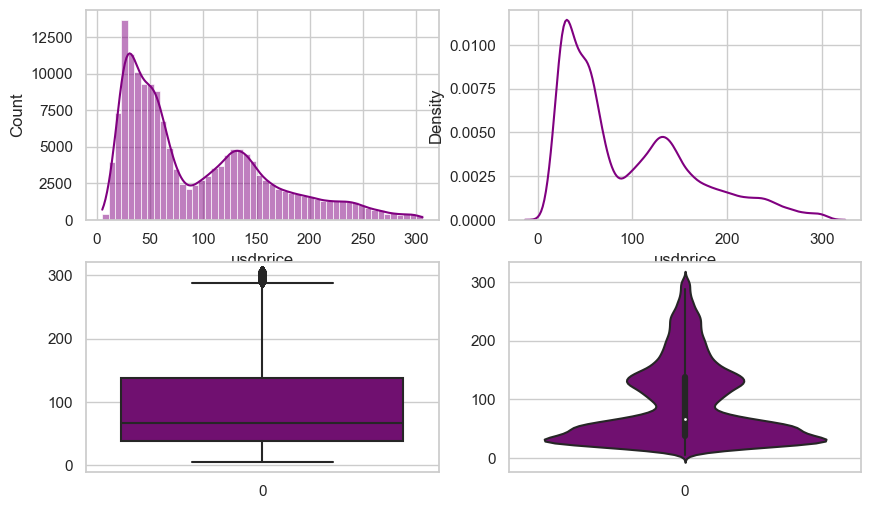

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(x=df['usdprice'],bins=50,kde=True,color='purple')
plt.subplot(2,2,2)
sns.kdeplot(df['usdprice'],color='purple')
plt.subplot(2,2,3)
sns.boxplot(df['usdprice'],color='purple')
plt.subplot(2,2,4)
sns.violinplot(df['usdprice'],color='purple')

<Axes: xlabel='longitude', ylabel='latitude'>

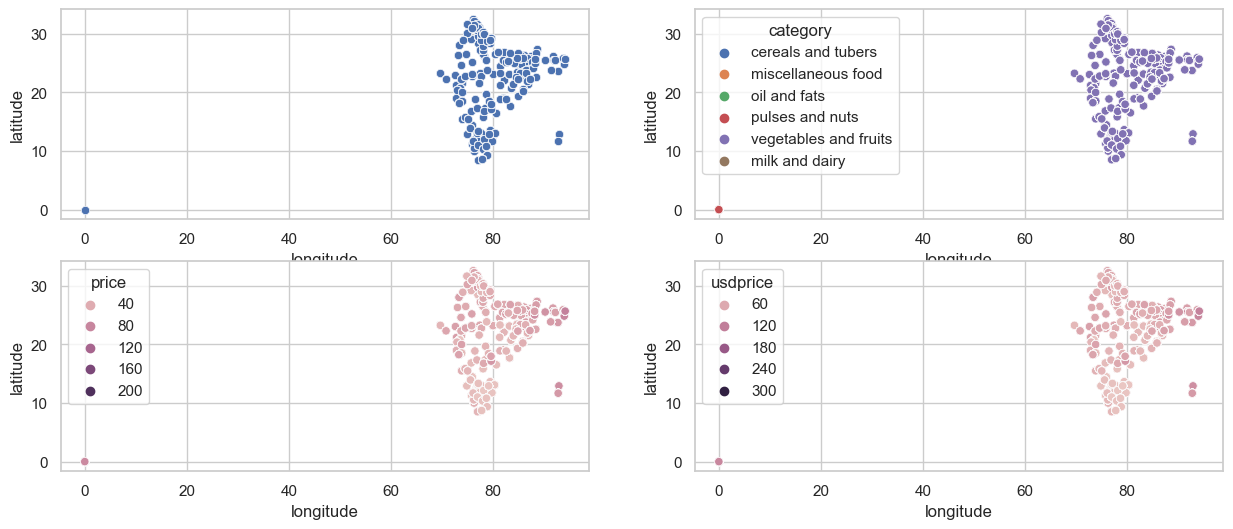

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.scatterplot(x='longitude',y='latitude',data=df)
plt.subplot(2,2,2)
sns.scatterplot(x='longitude',y='latitude',hue='category',data=df)
plt.subplot(2,2,3)
sns.scatterplot(x='longitude',y='latitude',hue='price',data=df)
plt.subplot(2,2,4)
sns.scatterplot(x='longitude',y='latitude',hue='usdprice',data=df)

<Axes: xlabel='price', ylabel='usdprice'>

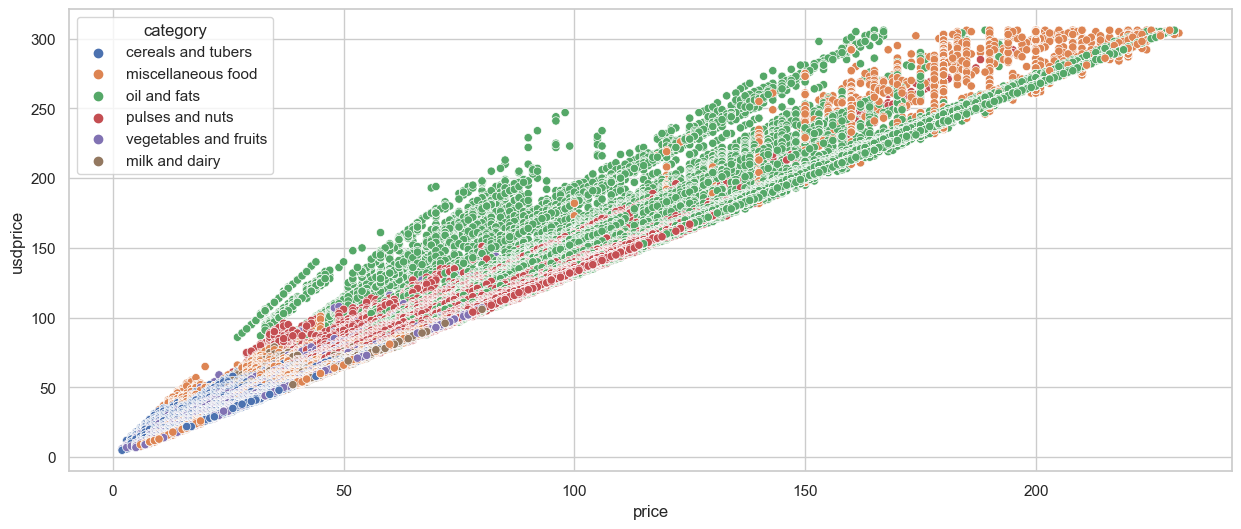

In [27]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='price',y='usdprice',hue='category',data=df)

### Observation :
1. Miscellaneous food price is higher.
2. Second is our Oil and Fats
3. Pulses and Nuts

<Figure size 2000x600 with 0 Axes>

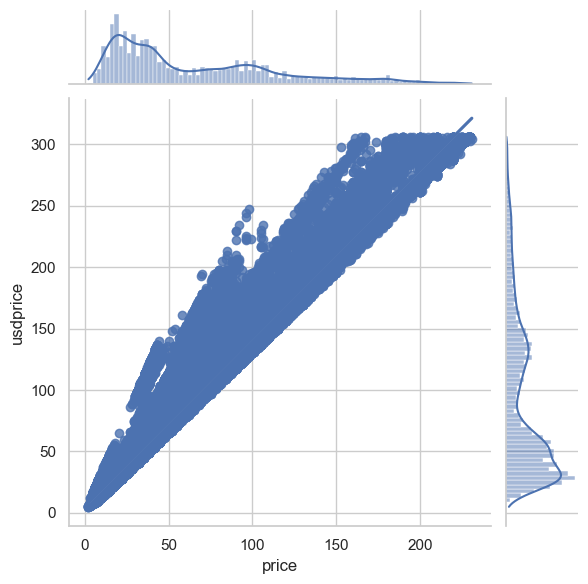

In [28]:
plt.figure(figsize=(20,6))
sns.jointplot(x='price',y='usdprice',data=df,kind='reg')

<Figure size 2000x600 with 0 Axes>

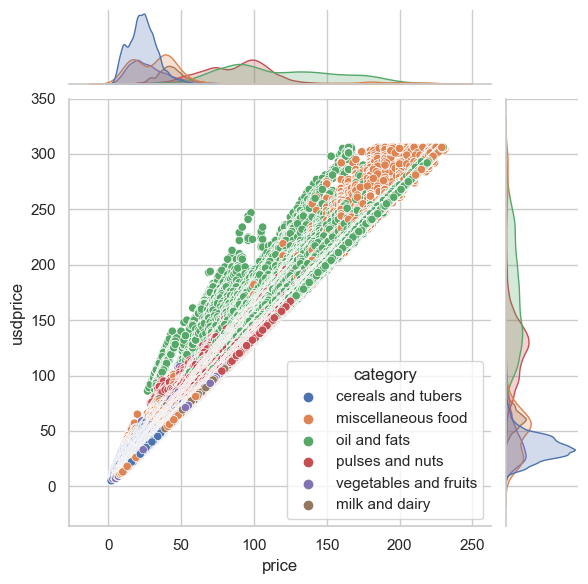

In [29]:
plt.figure(figsize=(20,6))
sns.jointplot(x='price',y='usdprice',hue='category',data=df)

### Observation :
__Indian and USD Price__
1. Cereals and tubers price are low.
2. miscellaneous food
3. oil and fats

# 1. Price of Food in India and USD in every year.

<Axes: xlabel='Year', ylabel='usdprice'>

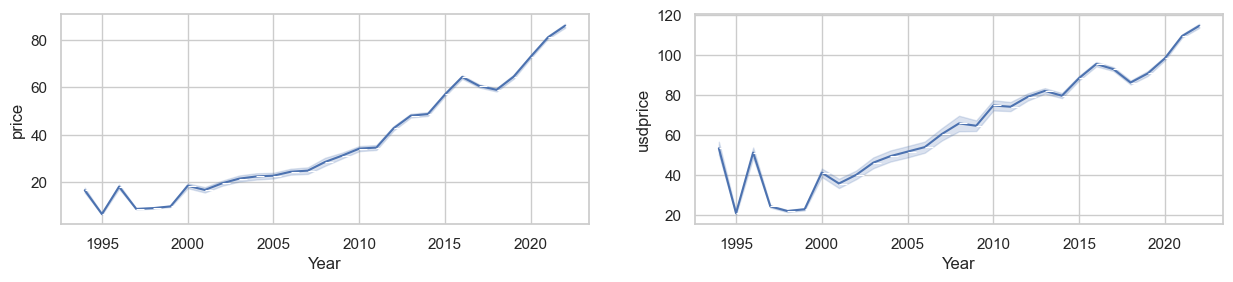

In [30]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.lineplot(x='Year',y='price',data=df,legend='auto',marker=True)
plt.subplot(2,2,2)
sns.lineplot(x='Year',y='usdprice',data=df,legend='auto',marker=True)

<Axes: ylabel='usdprice'>

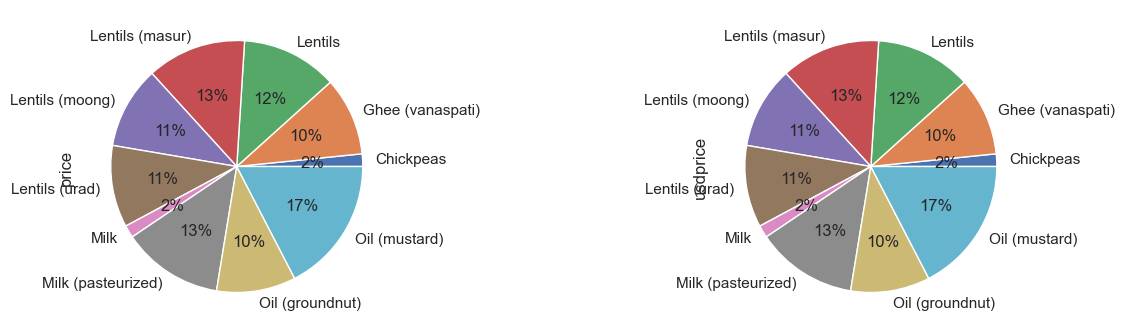

In [31]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
df.groupby('commodity')['price'].size()[:10].plot(kind='pie',autopct='%1.f%%')
plt.subplot(2,2,2)
df.groupby('commodity')['usdprice'].size()[:10].plot(kind='pie',autopct='%1.f%%')

### Observation :
__The food pricing increasing per year in both India and foreign country.
Food price inflation refers to the sustained and continuous rise in the prices of essential food items over time. This phenomenon affects consumers, producers, and policymakers alike, creating economic, social, and political implications.__

# 2. Expensive Food In India

<Axes: ylabel='category'>

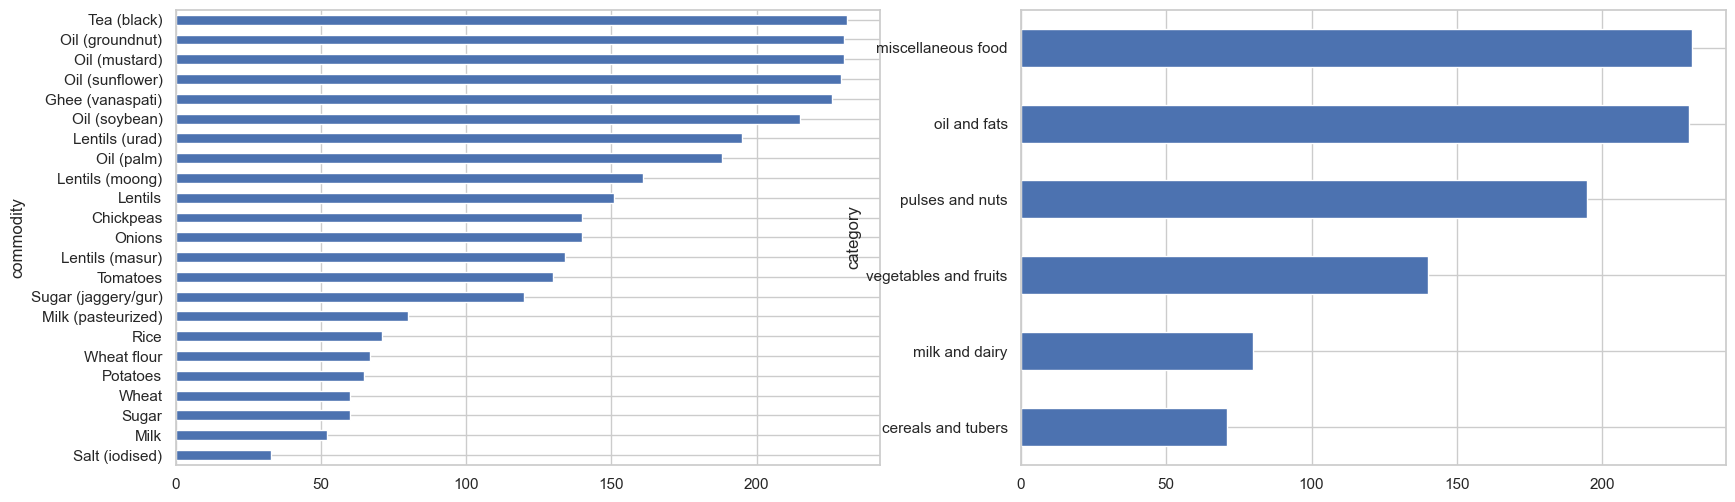

In [32]:
plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
df.groupby('commodity')['price'].max().sort_values().plot(kind='barh')
plt.subplot(2,2,2)
df.groupby('category')['price'].max().sort_values().plot(kind='barh')

### Observation :
__Expensive food range in India__
1. In minimum range Salt product and maximum is Tea(Black) in commodity.
2. In category miscellaneous food is higher and lowest is cereals and tubers.


<Axes: ylabel='category'>

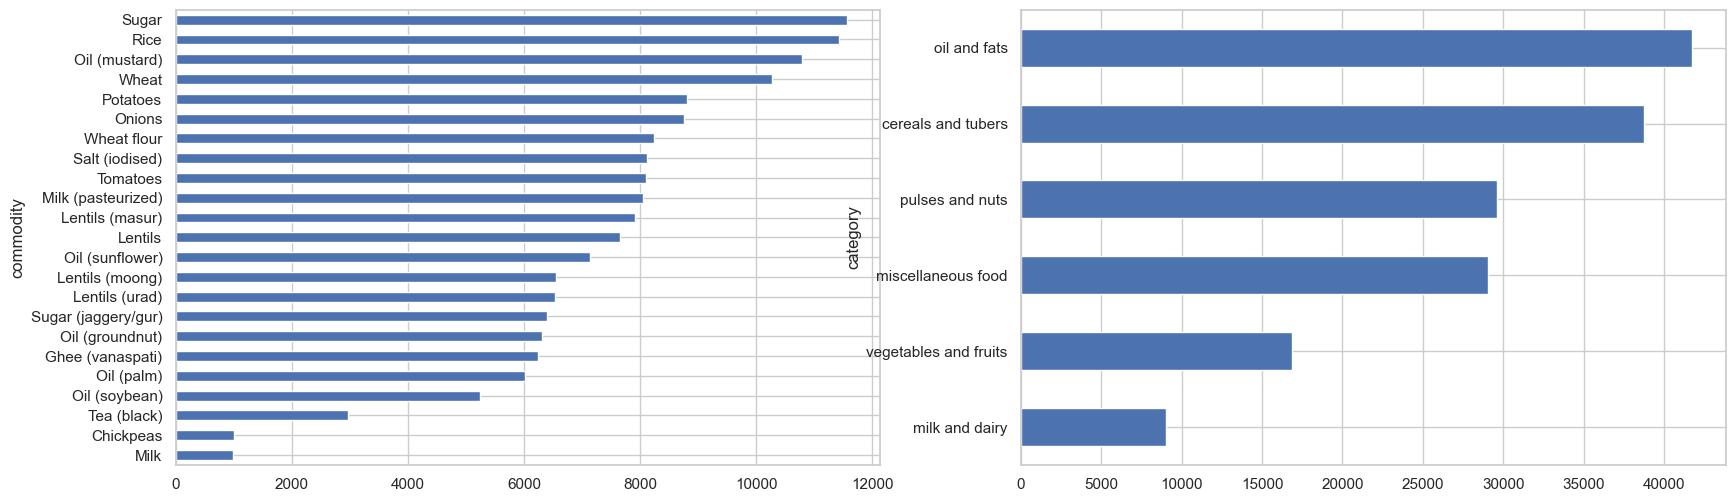

In [33]:
plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
df.groupby('commodity')['price'].size().sort_values().plot(kind='barh')
plt.subplot(2,2,2)
df.groupby('category')['price'].size().sort_values().plot(kind='barh')

### Observation :
1. Sugar,Rice,Oil are most selling product and Milk is less 
2. Oil and Fats and cerals and tubers are more.

# 3. Most Selling Food Per Year 

<Axes: xlabel='category', ylabel='count'>

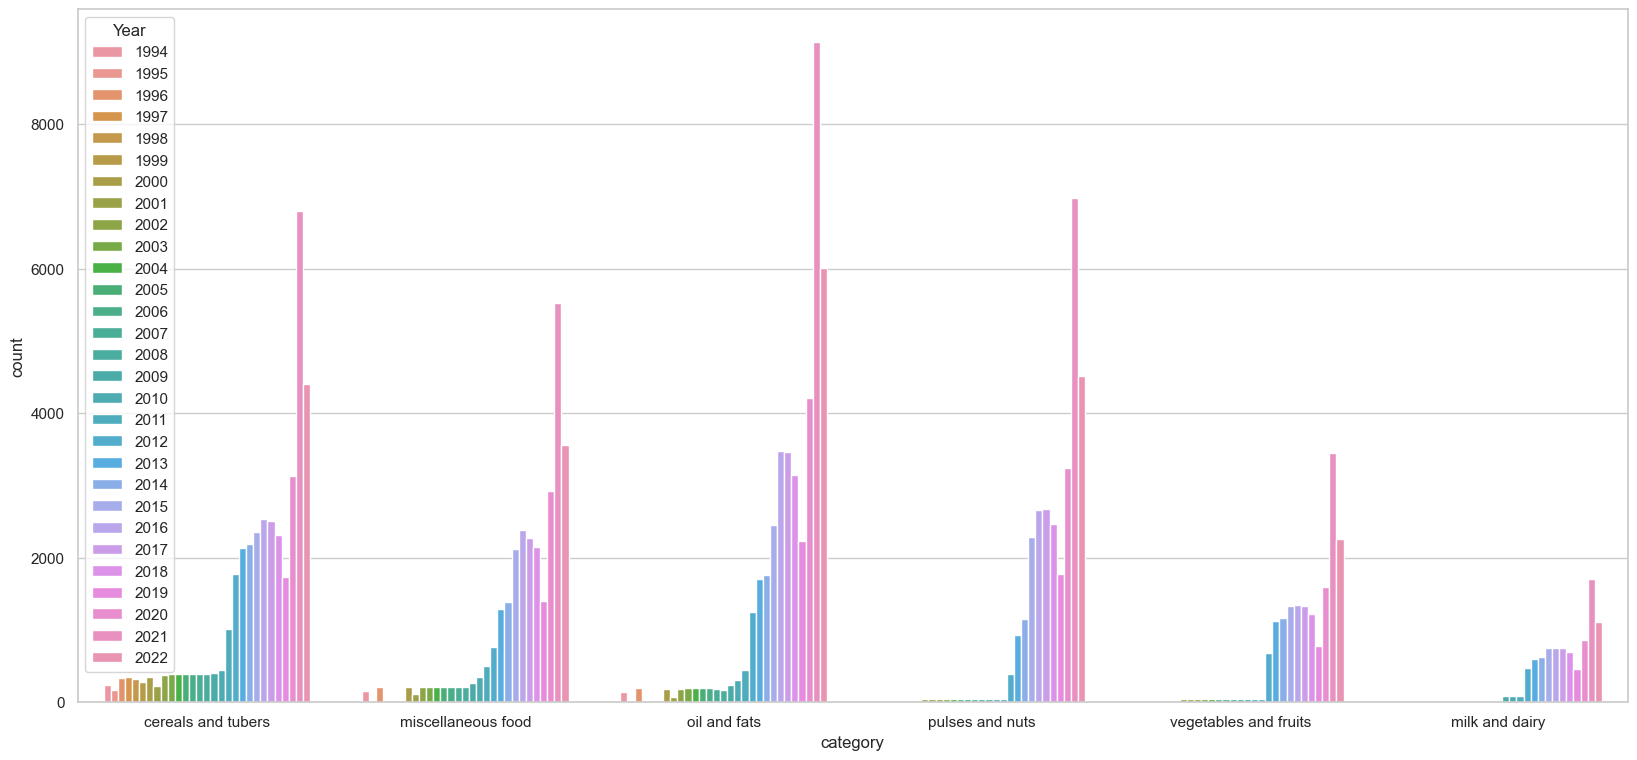

In [44]:
plt.figure(figsize=(20,9))
sns.countplot(x='category',hue='Year',data=df)

### Observation :
In Year 2018-2019 Oil and Fats come in most selling food then cereals and tubers.

# 4. Best Selling Food in India 

C:\Users\Nikhil\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\Nikhil\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



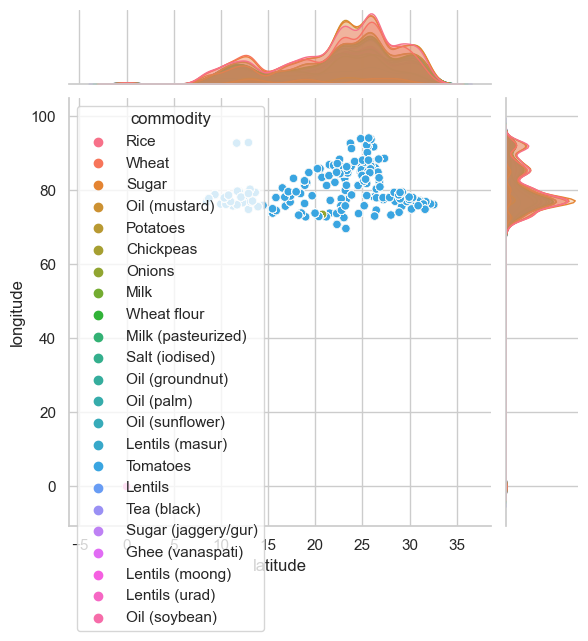

In [36]:
sns.jointplot(x='latitude',y='longitude',hue='commodity',data=df)

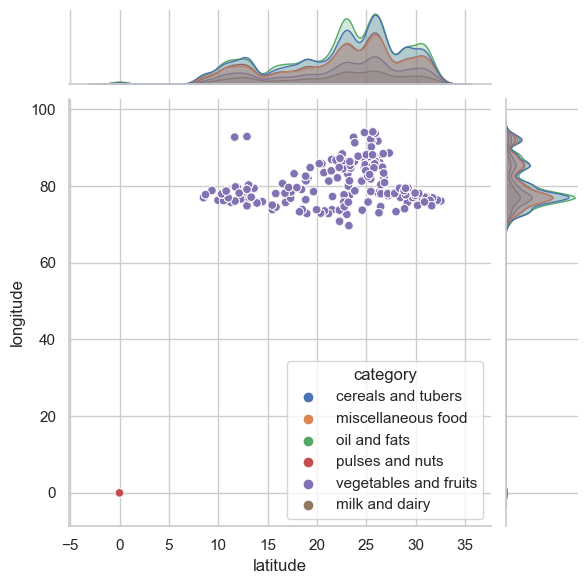

In [37]:
sns.jointplot(x='latitude',y='longitude',hue='category',data=df)

### Above are the chart of best top-selling food items in India across different categories. 

# Conclusion :

1. The Food Price is increasing per year in India and Other Country.
2. Tea,Oil,Ghee are expensive products of all and Oils and Fats, Cerals and tubers are higher.
3. Sugar,Rice are higher production quantity.
4. In Year 2018-2019 Oil and Fats come in most selling food then cereals and tubers